- Name: Aniket Kale
- R programming

In [1]:
# import libraries
library(ISwR)
data <- lung
head(data)

volume,method,subject
3.3,A,1
3.1,B,1
4.0,C,1
2.5,A,2
2.6,B,2
2.8,C,2


In [2]:
# Dataset numerically and Summary of dataset
summary(data)

     volume      method subject
 Min.   :2.500   A:6    1:3    
 1st Qu.:2.825   B:6    2:3    
 Median :3.100   C:6    3:3    
 Mean   :3.228          4:3    
 3rd Qu.:3.575          5:3    
 Max.   :4.100          6:3    

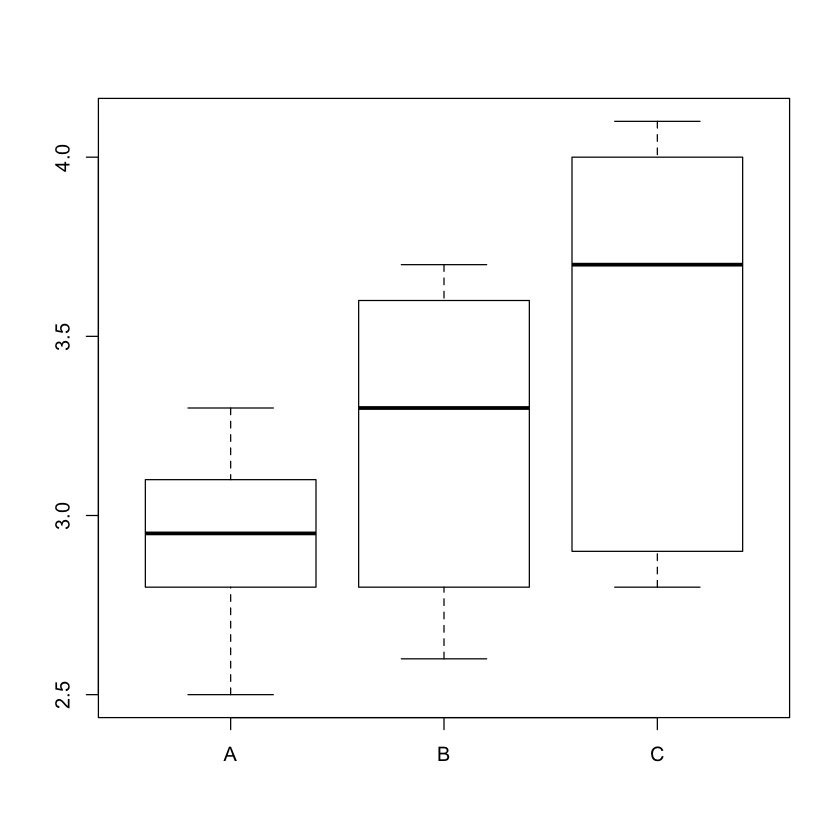

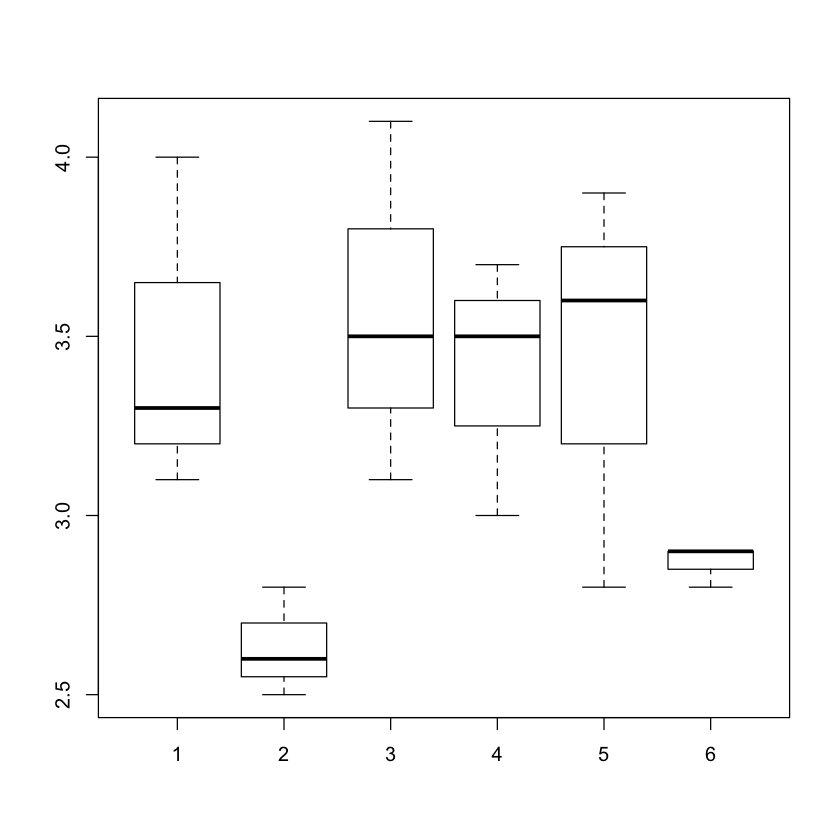

In [3]:
# Lets see he boxplot in between independent groups
boxplot(data$volume ~ data$method)
boxplot(data$volume ~ data$subject)

- We can clearly see the difference in between the groups.

In [4]:
# Now we are more interested in the Anova. to figure out the difference in between means of group = zero

In [5]:
# lets see the one way anova for method group
anova_method <- anova(lm(data$volume ~ data$method))
anova_method

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data$method,2,1.081111,0.5405556,2.689331,0.1004308
Residuals,15,3.015000,0.2010000,NA,NA


In [6]:
# Check the assumptions
shapiro.test(resid(lm(data$volume~data$method)))

# Resid norammly distrubuted.


	Shapiro-Wilk normality test

data:  resid(lm(data$volume ~ data$method))
W = 0.92451, p-value = 0.1554


- We cannot reject the null hypothisis that means there is no difference in mean in between the groups.

In [7]:
anova(lm(data$volume ~ data$subject))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data$subject,5,2.182778,0.4365556,2.737979,0.07096364
Residuals,12,1.913333,0.1594444,NA,NA


In [8]:
shapiro.test(resid(lm(data$volume~data$subject)))
# Normally distrbuted.


	Shapiro-Wilk normality test

data:  resid(lm(data$volume ~ data$subject))
W = 0.96717, p-value = 0.7432


- We cannot reject the null hypothisis that means there is no difference in mean in between the groups(subject).

In [10]:
final <- anova(lm(data$volume ~ as.factor(data$subject) + as.factor(data$method)))
final

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
as.factor(data$subject),5,2.1827778,0.43655556,5.245661,0.01271169
as.factor(data$method),2,1.0811111,0.54055556,6.495327,0.01556838
Residuals,10,0.8322222,0.08322222,NA,NA


# Here 2 way Anova, We can reject the NUll hypothesis that means one of our mean of group has different mean.

- P value(0.01) < 0.05 

- We cannot check for the intearaction since we dont have binary group we have 3 levels.
- both groups are significant. P value less than 0.05 cutoff

In [11]:
TukeyHSD(aov(data$volume~as.factor(data$method) + as.factor(data$subject)))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$volume ~ as.factor(data$method) + as.factor(data$subject))

$`as.factor(data$method)`
         diff        lwr       upr     p adj
B-A 0.2833333 -0.1732445 0.7399112 0.2520218
C-A 0.6000000  0.1434222 1.0565778 0.0122174
C-B 0.3166667 -0.1399112 0.7732445 0.1885516

$`as.factor(data$subject)`
           diff         lwr        upr     p adj
2-1 -0.83333333 -1.65145666 -0.0152100 0.0453208
3-1  0.10000000 -0.71812333  0.9181233 0.9976751
4-1 -0.06666667 -0.88479000  0.7514567 0.9996680
5-1 -0.03333333 -0.85145666  0.7847900 0.9999891
6-1 -0.60000000 -1.41812333  0.2181233 0.1976352
3-2  0.93333333  0.11521000  1.7514567 0.0237972
4-2  0.76666667 -0.05145666  1.5847900 0.0696726
5-2  0.80000000 -0.01812333  1.6181233 0.0562068
6-2  0.23333333 -0.58479000  1.0514567 0.9108816
4-3 -0.16666667 -0.98479000  0.6514567 0.9766629
5-3 -0.13333333 -0.95145666  0.6847900 0.9912276
6-3 -0.70000000 -1

- TukeyHSD Comaprision means in between groups where P value < 0.05